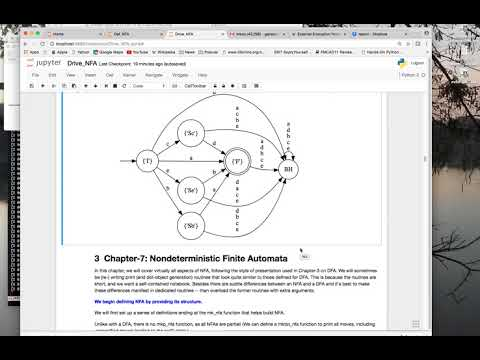

In [1]:
# This is a potentially helpful video from long ago... watch it if you've not, before.
from IPython.display import YouTubeVideo
YouTubeVideo('xjFtLF95uBc')

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4863, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 4863 (delta 137), reused 151 (delta 65), pack-reused 4634
Receiving objects: 100% (4863/4863), 7.55 MiB | 25.44 MiB/s, done.
Resolving deltas: 100% (3142/3142), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)

## Question 1:

### Part a:

* Design an NFA for $\{0,1\}^* \{1\} \{0\}$. In other words, this NFA accepts strings that end in 10.

* Document sufficiently to reveal the design (a comment per key line)

*  Here are the required state names:

    - If the initial state is also a final state, then its name must be IF, else it must be I

    - After consuming a 0 or a 1, end up in state S0 or S1 (if not already accepting); else transition to F0 or F1 as appropriate

    - Continue this way: that is S1 goes to S10 if non-accepting; else to F10

In [4]:
nfaEnds10 = md2mc('''
NFA 
 
!! Repeat if it's a 0 or 1 and continue if it sees a 1
I  : 0 -> I
I  : 1 -> I, S1
!! Only go to a final state if it takes a 0
S1 : 0 -> F10
 
''')

### Part b: 
- Put the above NFA in animation, and note down the set of states attained
after the DFA has seen every character in 10010. More detailed instructions follow.

#### Execute the cell below and follow the bulleted instructions

- When the animation pane comes up, type in 10010 and click Animate

- Then click the ">|" button, which is for single-stepping

- Note down the results as you single-step, and fill answers in 1b(ii) below

In [5]:
AnimateNFA(nfaEnds10, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

#### Provide these answers based on single-stepping the animation (please provide it as a SET OF STATES - else we won't give you any points). 

#### Choose one of these 3 options for the multiple choice part:
##### (a) A token dropped out of the diagram (with the move on a symbol being undefined)
##### (b) The NFA reached a final state
##### (c) Neither 

### Question 1: What is the set of states before consuming any of 10010? 
##### The set of state is:  { I }
##### Multiple choice answer: (c)

### Question 2: What is the set of states AFTER consuming "1" and before consuming "0010"?

### What do we mean by "AFTER consuming '1' " ??

### There are three phases to consuming a '1' in the animation window and we will explain it now:

#### 1) See that the animation has a window with 3 cells
#### 2) When you administer the first click on the step forward or >| button,  '1' moves into the middle window. It is like a '1' in the "mouth of the NFA"
#### 3) One click later , the '1' goes into the left cell and there is a "" in the middle, imagine that the NFA has 'chewed' the '1' and is about to "swallow it"
#### 4) When the "" in the middle cells is also gone and the middle cell is blank, the NFA has swallowed what it was chewing, and it is traveling toward its stomach. That is when it is in a "after consuming a 1" state. 

##### The set of state is:   { I, S1 }
##### Multiple choice answer:  (c)

### Question 3: What is the set of states AFTER consuming "10" and before consuming "010"?
##### The set of state is:  { I, F10 }
##### Multiple choice answer: (b)

### Question 4: What is the set of states AFTER consuming "100" and before consuming "10"?
##### The set of state is:  { I }
##### Multiple choice answer: (a)

### Question 5: What is the set of states AFTER consuming "1001" and before consuming "0"?
##### The set of state is:  { I, S1 }
##### Multiple choice answer: (c)

### Question 6: What is the set of states AFTER consuming "10010" entirely?
##### The set of state is:  { I, F10 }
##### Multiple choice answer: (b)

### Part c:

Convert the NFA to a DFA and answer the questions below

In [ ]:
#Run this cell to convert the NFA to a DFA
dotObj_dfa(nfa2dfa(nfaEnds10, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

#### Question 1: What is the state the DFA is in after 10010?
##### Answer: .... provide answer here ...

### Question-2: What is the set of states NFA is in after 10010? Express as a set of states of the NFA.

##### Answer:  { ... }

### Question 3: Do the above match, in the sense that the set of states that the NFA finds itself, when converted to a DFA state by inserting the underscores ("_") matches the DFA state?

##### Answer:  ... answer ... 

### Question 4: Provide the reason why they do/don't match:

##### Answer:  ... refer to the subset construction algorithm in your answer ... 

## Question 2:

### A tutorial on Concatenating NFA
Please watch this video:

To watch the video separately in Youtube in large size, 
visit https://youtu.be/VWyOT1uYfIc

Otherwise just run the command below!

In [ ]:
# NFA Concatenation
from IPython.display import YouTubeVideo
YouTubeVideo('VWyOT1uYfIc')

### Part a:
- Design an NFA for $\{\varepsilon, 0\}$ 
- It will be a 2-state NFA with an IF state and a final state (call that final state "F2" )

In [ ]:
nfaEps0 = md2mc('''
NFA 
 
!! -- Define your NFA below --

''')

In [ ]:
dotObj_nfa(nfaEps0)

### Part b: 

* Concatenate nfaEnds10 and nfaEps0 to obtain nfaEnds10Eps0. 

* Here is how the concatenation must be documented in the space below:

* Put the transitions that came from "nfaEnds10" in the designated vacant space below. Make suitable state-name changes as described below.

* Put the right number of epsilon-labeled Bridge Transitions connecting the final states of the first NFA (which would no longer be final) with the initial states of the second NFA (which would no longer be initial). 

* Put the transitions that came from nfaEps0 after that

* Given that the first NFA potentially "lost" some final states while the second NFA "lost" some initial states, make suitable state name changes

  - E.g. an Fx state may become an Sx state, for some 'x'
  
  - E.g. an IFy state may become an Fy state, for some 'y'


### Part c: 
- Define the concatenation NFA below.


In [ ]:
# Here is the resulting NFA

nfaEnds10Eps0 = md2mc('''
NFA  

!! == nfaEnds10 transitions below, with suitable modifications ==

 
 
 !! -- Document the transition changes in the above list as follows, within comments --
 
 !! The original transition was ...
 !! This was changed to ... because some states are/are not   final / non-final  ...
 
   
 
 !! == Bridge takes to the initial state of the second NFA is below ==
 
 
 !! The initial state of the second NFA was ...
 !! We change it suitably as follows ...
 
 
 !! == nfaEps0 transitions below, with suitable modifications ==
 
 
 
''')

### Part d: 
- Draw the concat NFA and convert to a DFA
- Run the THREE commands below, and then move on to answer problem 3 
based on the results you observe from these commands


In [ ]:
# command-1
dotObj_nfa(nfaEnds10Eps0)

In [ ]:
# command-2

dotObj_dfa(nfa2dfa(nfaEnds10Eps0, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

In [ ]:
# Let us see its internal representation -- this may give you hints for answering your question

# 

nfaEnds10Eps0

## Question 3:

- After converting the NFA nfaEnds10Eps0 to a DFA, we see new states and new state transitions. Explain the NFA2DFA algorithm by explaining the reason of the appearance of every state and their state transition.
- For example: 
  - Explains why state X shows up after converting the NFA to DFA.
  - Explain the state transition of state X to its neighbor states.
  
Here is a likely explanation (a few examples shown)


* State ... in the DFA came from the NFA state ... after e-closure of the set of states .... This Eclosure results in ... . And state ... goes back to itself after a ...

* Use suitable variants of this style of explaining each of the DFA transitions.

* Use as many bullets as needed

* === YOUR ANSWER BELOW ===

*  

## Question 4:

### Brzozowski's minimization

A DFA can be minimized simply by following the steps below (also refers to section 7.7). In this problem, you will practice those steps on an initial bloated DFA given to you.

The steps are these:

1. Reverse the given DFA, say DFA_bloated, to obtain an NFA called NFA1 (use the rev_dfa function)

2. Determinize NFA1 to obtain a DFA called DFA2

3. Reverse DFA2 to obtain another NFA, say NFA2

4. Determinize NFA2 to obtain the final minimized DFA, say DFA_min

Given a DFA_bloated below:

In [ ]:

DFA_bloated = md2mc('''

DFA

IS1: a -> Temp
IS1: b -> FS3

Temp: a -> FS2
Temp: b -> FS3

FS2: a -> S4
FS2: b -> S5

FS3: a -> S5
FS3: b -> S4

S4: a|b -> FS6
S5: a|b -> FS6

FS6: a|b -> FS6

''')

In [ ]:
dotObj_dfa(DFA_bloated)

### Part a: Reverse the above DFA

In [ ]:
help(rev_dfa)

In [ ]:
# Reverse DFA_bloated here
NFA1 =  "... OBTAIN THE REVERSE OF DFA_bloated by running the rev_dfa command... "

 

In [ ]:
dotObj_nfa(NFA1)

### Part b: Check that NFA1 is indeed the reverse of DFA_bloated

Note: "aabba" is in DFA_bloated's language but its reversal (i.e. "abbaa") is in NFA1's language

#### Which path does abbaa take in being accepted by NFA1 ?


* == YOUR ANSWER BELOW ==

* Starting from State { ... }

* The next state after 'a' is { ... }

* The next state after 'b' is { ... }

* The next state after 'b' is { ... }

* The next state after 'a' is { ... }

* The next state after 'a' is ...  { ... }  -- which is a final state, because it contains a "double-circled state". It is possible that this state name does not begin with "F" because since we reversed the initial DFA, some "I" states would now be a final state. This is OK.



### Part c: Determinize NFA1 to obtain DFA2

In [ ]:
help(nfa2dfa)

In [ ]:
DFA2 = "...DETERMINIZE NFA1 to obtain DFA2 ..."
 

In [ ]:
dotObj_dfa(DFA2)

### Part d: Reverse DFA2 to obtain NFA3

In [ ]:
NFA3 = "... REVERSE DFA2 to obtain NFA3 ..."
 

In [ ]:
dotObj_nfa(NFA3)

### Part e:  Determinize NFA3 to obtain DFA_min


In [ ]:
DFA_min = "... DETERMINIZE NFA3 via the nfa2dfa command to obtain the desired min DFA...."
 

In [ ]:
dotObj_dfa(DFA_min)

### Part f: Check that DFA_min and DFA_bloated have the same language but are not isomorphic

In [ ]:
help(langeq_dfa)

In [ ]:
help(iso_dfa)

In [ ]:
...SHOW THAT DFA_bloated and DFA_min HAVE THE SAME LANGUAGE by using langeq_dfa function ...

In [ ]:
...SHOW THAT DFA_bloated and DFA_min are NOT isomorphic by using iso_dfa function ...

In [ ]:
DFA_min_alt = min_dfa(DFA_bloated)

In [ ]:
dotObj_dfa(DFA_min)

In [ ]:
dotObj_dfa(DFA_min_alt)

In [ ]:
help(iso_dfa)

In [ ]:
"...SHOW THAT DFA_min and DFA_min_alt are isomorphic by using iso_dfa function..."

... invoke the iso_dfa call here ...


### Here are some notes to understand Brzozowski's method

* If you are given a DFA "D1", a minimal DFA for "reverse(D1)" is obtained by "reverse followed by determinize"

* But since we are interested in the minimal DFA for "D1" (and not reverse(D1)), we do these steps again!

* Hence the algorithm becomes "reverse THEN determinize THEN reverse THEN determinize"